# Конвергентная валидность: Евросоюз в гендерных индексах

In [1]:
from randan.descriptive_statistics import ScaleStatistics # интервальная статистика
import pandas as pd # для обработки и анализа структурированных данных
import numpy as np# для корректной работы рандана 
from randan.bivariate_association import Correlation
import matplotlib.pyplot as plt # для визуализации данных
import seaborn as sns # для визуализации данных

Массив данных находится в папке: https://disk.yandex.ru/d/PWOTilngObaAJg 

In [2]:
# загружаем таблицу
df = pd.read_excel('eu_reversed.xlsx')

In [3]:
# дескриптивная статистика
# 25 стран
df.describe()

,ООН 2023 Индекс эмпауэрмента,ООН 2023 Индекс равноправия,ВЭФ 2023 Индекс разрыва,ОЭСР 2023 Индекс Инстит. мер,Равные меры 2020 Индекс ЦУР,ООН 2022 Индекс развития,ООН 2022 Индекс неравенства,ЕС 2022 Индекс равенства
count,27.000000,27.000000,27.000000,25.000000,27.000000,27.000000,27.000000,27.000000
mean,0.743407,0.783630,0.753185,0.865680,0.824108,0.989074,0.901111,0.658737
std,0.050017,0.069222,0.048296,0.036568,0.047308,0.017070,0.068070,0.086783
min,0.623000,0.641000,0.678000,0.806000,0.728438,0.960000,0.747000,0.534160
25%,0.704000,0.752000,0.714000,0.843000,0.791571,0.978500,0.881500,0.591273
50%,0.756000,0.781000,0.756000,0.869000,0.825778,0.988000,0.916000,0.650469
75%,0.780000,0.837000,0.792500,0.902000,0.851718,0.996500,0.951500,0.742635
max,0.828000,0.925000,0.863000,0.926000,0.904241,1.028000,0.991000,0.839465


In [4]:
# удаляем пробелы, остается 25 стран
df = df.dropna()
df

,Страна,ООН 2023 Индекс эмпауэрмента,ООН 2023 Индекс равноправия,ВЭФ 2023 Индекс разрыва,ОЭСР 2023 Индекс Инстит. мер,Равные меры 2020 Индекс ЦУР,ООН 2022 Индекс развития,ООН 2022 Индекс неравенства,ЕС 2022 Индекс равенства,Регион,Страны
0,Austria,0.778,0.808,0.740,0.902,0.887281,0.972,0.952,0.688020,Центральная,Западные
1,Belgium,0.801,0.869,0.796,0.926,0.847328,0.975,0.956,0.741968,Центральная,Западные
2,Bulgaria,0.701,0.767,0.715,0.811,0.740493,0.995,0.794,0.606953,Южная,Постсоветские
3,Croatia,0.730,0.772,0.730,0.831,0.796664,0.993,0.913,0.606893,Южная,Постсоветские
5,Czech Republic,0.707,0.680,0.685,0.850,0.825778,0.988,0.887,0.572393,Восточная,Постсоветские
6,Denmark,0.804,0.845,0.780,0.848,0.904241,0.981,0.991,0.778328,Северная,Западные
7,Estonia,0.750,0.774,0.782,0.869,0.843320,1.022,0.907,0.610253,Северная,Постсоветские
8,Finland,0.787,0.860,0.863,0.879,0.888920,0.989,0.968,0.754162,Северная,Западные
9,France,0.792,0.861,0.756,0.899,0.837744,0.986,0.916,0.751408,Западная,Западные
10,Germany,0.762,0.780,0.815,0.876,0.829576,0.966,0.929,0.686644,Центральная,Западные


In [5]:
# нормализуем данные
# (df-df.mean ())/df.std()

In [6]:
# проверяем нормальность распределения по каждому рейтингу
# тест Колмогорова-Смирнова
# распределение не является нормальным
ss = ScaleStatistics(df, ['ЕС 2022 Индекс равенства'], show_results=False, normality_test=True, normality_test_type='ks') 
ss.summary() 


NORMALITY TESTS
------------------



,statistic,p-value
ЕС 2022 Индекс равенства,0.149,0.169


,N,mode,median,mean,25%,75%,interquart. range,interquart. range (norm.),min,max,range,std,var,entropy coef.,quality var.
ЕС 2022 Индекс равенства,25.0,0.53416,0.650469,0.659106,0.60565,0.743303,0.137652,0.450868,0.53416,0.839465,0.305305,0.087212,0.007606,1.0,1.0


In [7]:
# корреляционный анализ, метод Спирмена
corr = Correlation(df, method = 'spearman', two_tailed = True, n_decimals=3)


CORRELATION SUMMARY (SPEARMAN METHOD, 2-TAILED)
------------------
The following variables were removed from the analysis since they do not belong to numerical dtypes: Страна, Регион, Страны



Note: Each empty index duplicates the previous one.
Maximum correlation is 0.911 (p-value 0.0) for variables ООН 2023 Индекс эмпауэрмента and ООН 2023 Индекс равноправия,
minimum correlation is -0.383 (p-value 0.059) for variables ООН 2022 Индекс развития and ООН 2022 Индекс неравенства.


In [8]:
# приводим в табличный вид для приложения в диссертации 
# метод Спирмена, для сравнения с другими рейтингами
corr.correlation_matrix

ООН 2023 Индекс эмпауэрмента  \
ООН 2023 Индекс эмпауэрмента Coefficient                  1.000000e+00   
                             p-value                               NaN   
                             N                            2.500000e+01   
ООН 2023 Индекс равноправия  Coefficient                  9.107006e-01   
                             p-value                      2.642078e-10   
                             N                            2.500000e+01   
ВЭФ 2023 Индекс разрыва      Coefficient                  7.394150e-01   
                             p-value                      2.410363e-05   
                             N                            2.500000e+01   
ОЭСР 2023 Индекс Инстит. мер Coefficient                  5.132846e-01   
                             p-value                      8.687688e-03   
                             N                            2.500000e+01   
Равные меры 2020 Индекс ЦУР  Coefficient                  8.166251e-01   
                             p-value                      6.397074e-07   
                             N                            2.500000e+01   
ООН 2022 Индекс развития     Coefficient                 -3.582435e-02   
                             p-value                      8.650058e-01   
                             N                            2.500000e+01   
ООН 2022 Индекс неравенства  Coefficient                  7.619323e-01   
                             p-value                      9.628539e-06   
                             N                            2.500000e+01   
ЕС 2022 Индекс равенства     Coefficient                  8.096980e-01   
                             p-value                      9.448849e-07   
                             N                            2.500000e+01   

                                          ООН 2023 Индекс равноправия  \
ООН 2023 Индекс эмпауэрмента Coefficient                 9.107006e-01   
                             p-value                     2.642078e-10   
                             N                           2.500000e+01   
ООН 2023 Индекс равноправия  Coefficient                 1.000000e+00   
                             p-value                              NaN   
                             N                           2.500000e+01   
ВЭФ 2023 Индекс разрыва      Coefficient                 7.441324e-01   
                             p-value                     2.004274e-05   
                             N                           2.500000e+01   
ОЭСР 2023 Индекс Инстит. мер Coefficient                 6.191301e-01   
                             p-value                     9.673332e-04   
                             N                           2.500000e+01   
Равные меры 2020 Индекс ЦУР  Coefficient                 7.286017e-01   
                             p-value                     3.627205e-05   
                             N                           2.500000e+01   
ООН 2022 Индекс развития     Coefficient                 1.058914e-02   
                             p-value                     9.599341e-01   
                             N                           2.500000e+01   
ООН 2022 Индекс неравенства  Coefficient                 7.337437e-01   
                             p-value                     2.993747e-05   
                             N                           2.500000e+01   
ЕС 2022 Индекс равенства     Coefficient                 8.001539e-01   
                             p-value                     1.577399e-06   
                             N                           2.500000e+01   

                                          ВЭФ 2023 Индекс разрыва  \
ООН 2023 Индекс эмпауэрмента Coefficient                 0.739415   
                             p-value                     0.000024   
                             N                          25.000000   
ООН 2023 Индекс равноправия  Coefficient                 0.744132   
                    

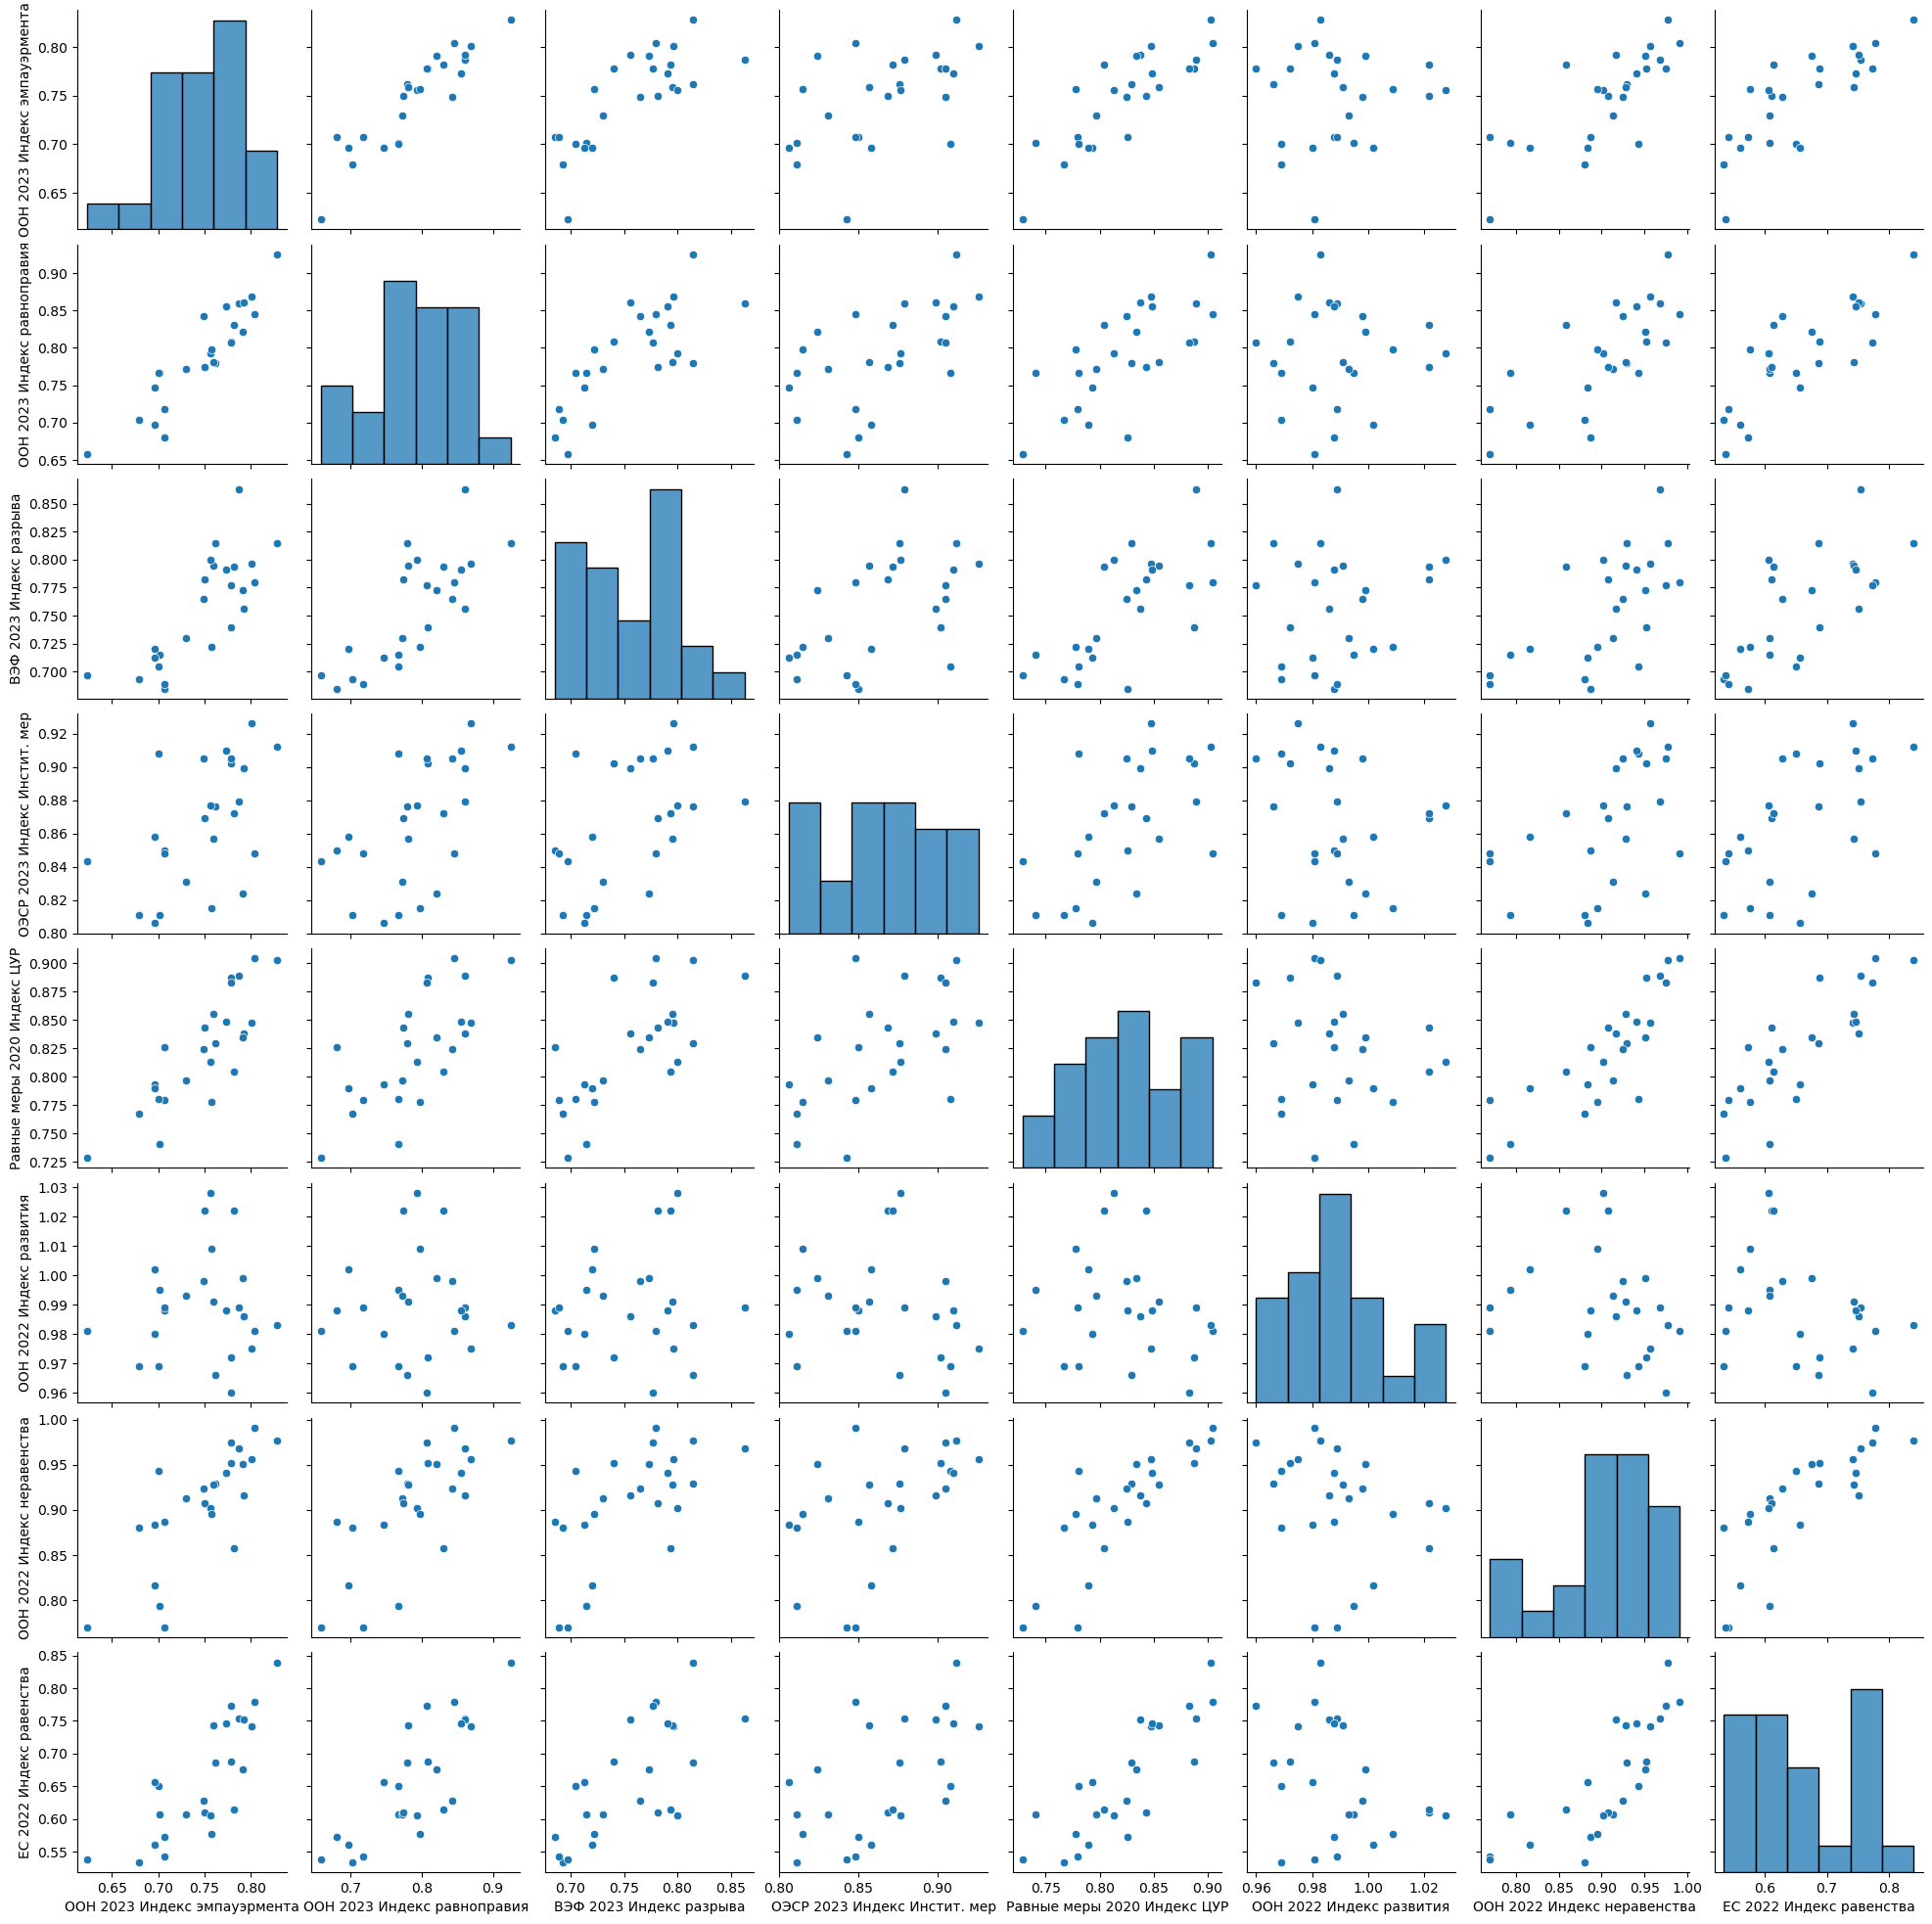

In [9]:
sns.pairplot(df);

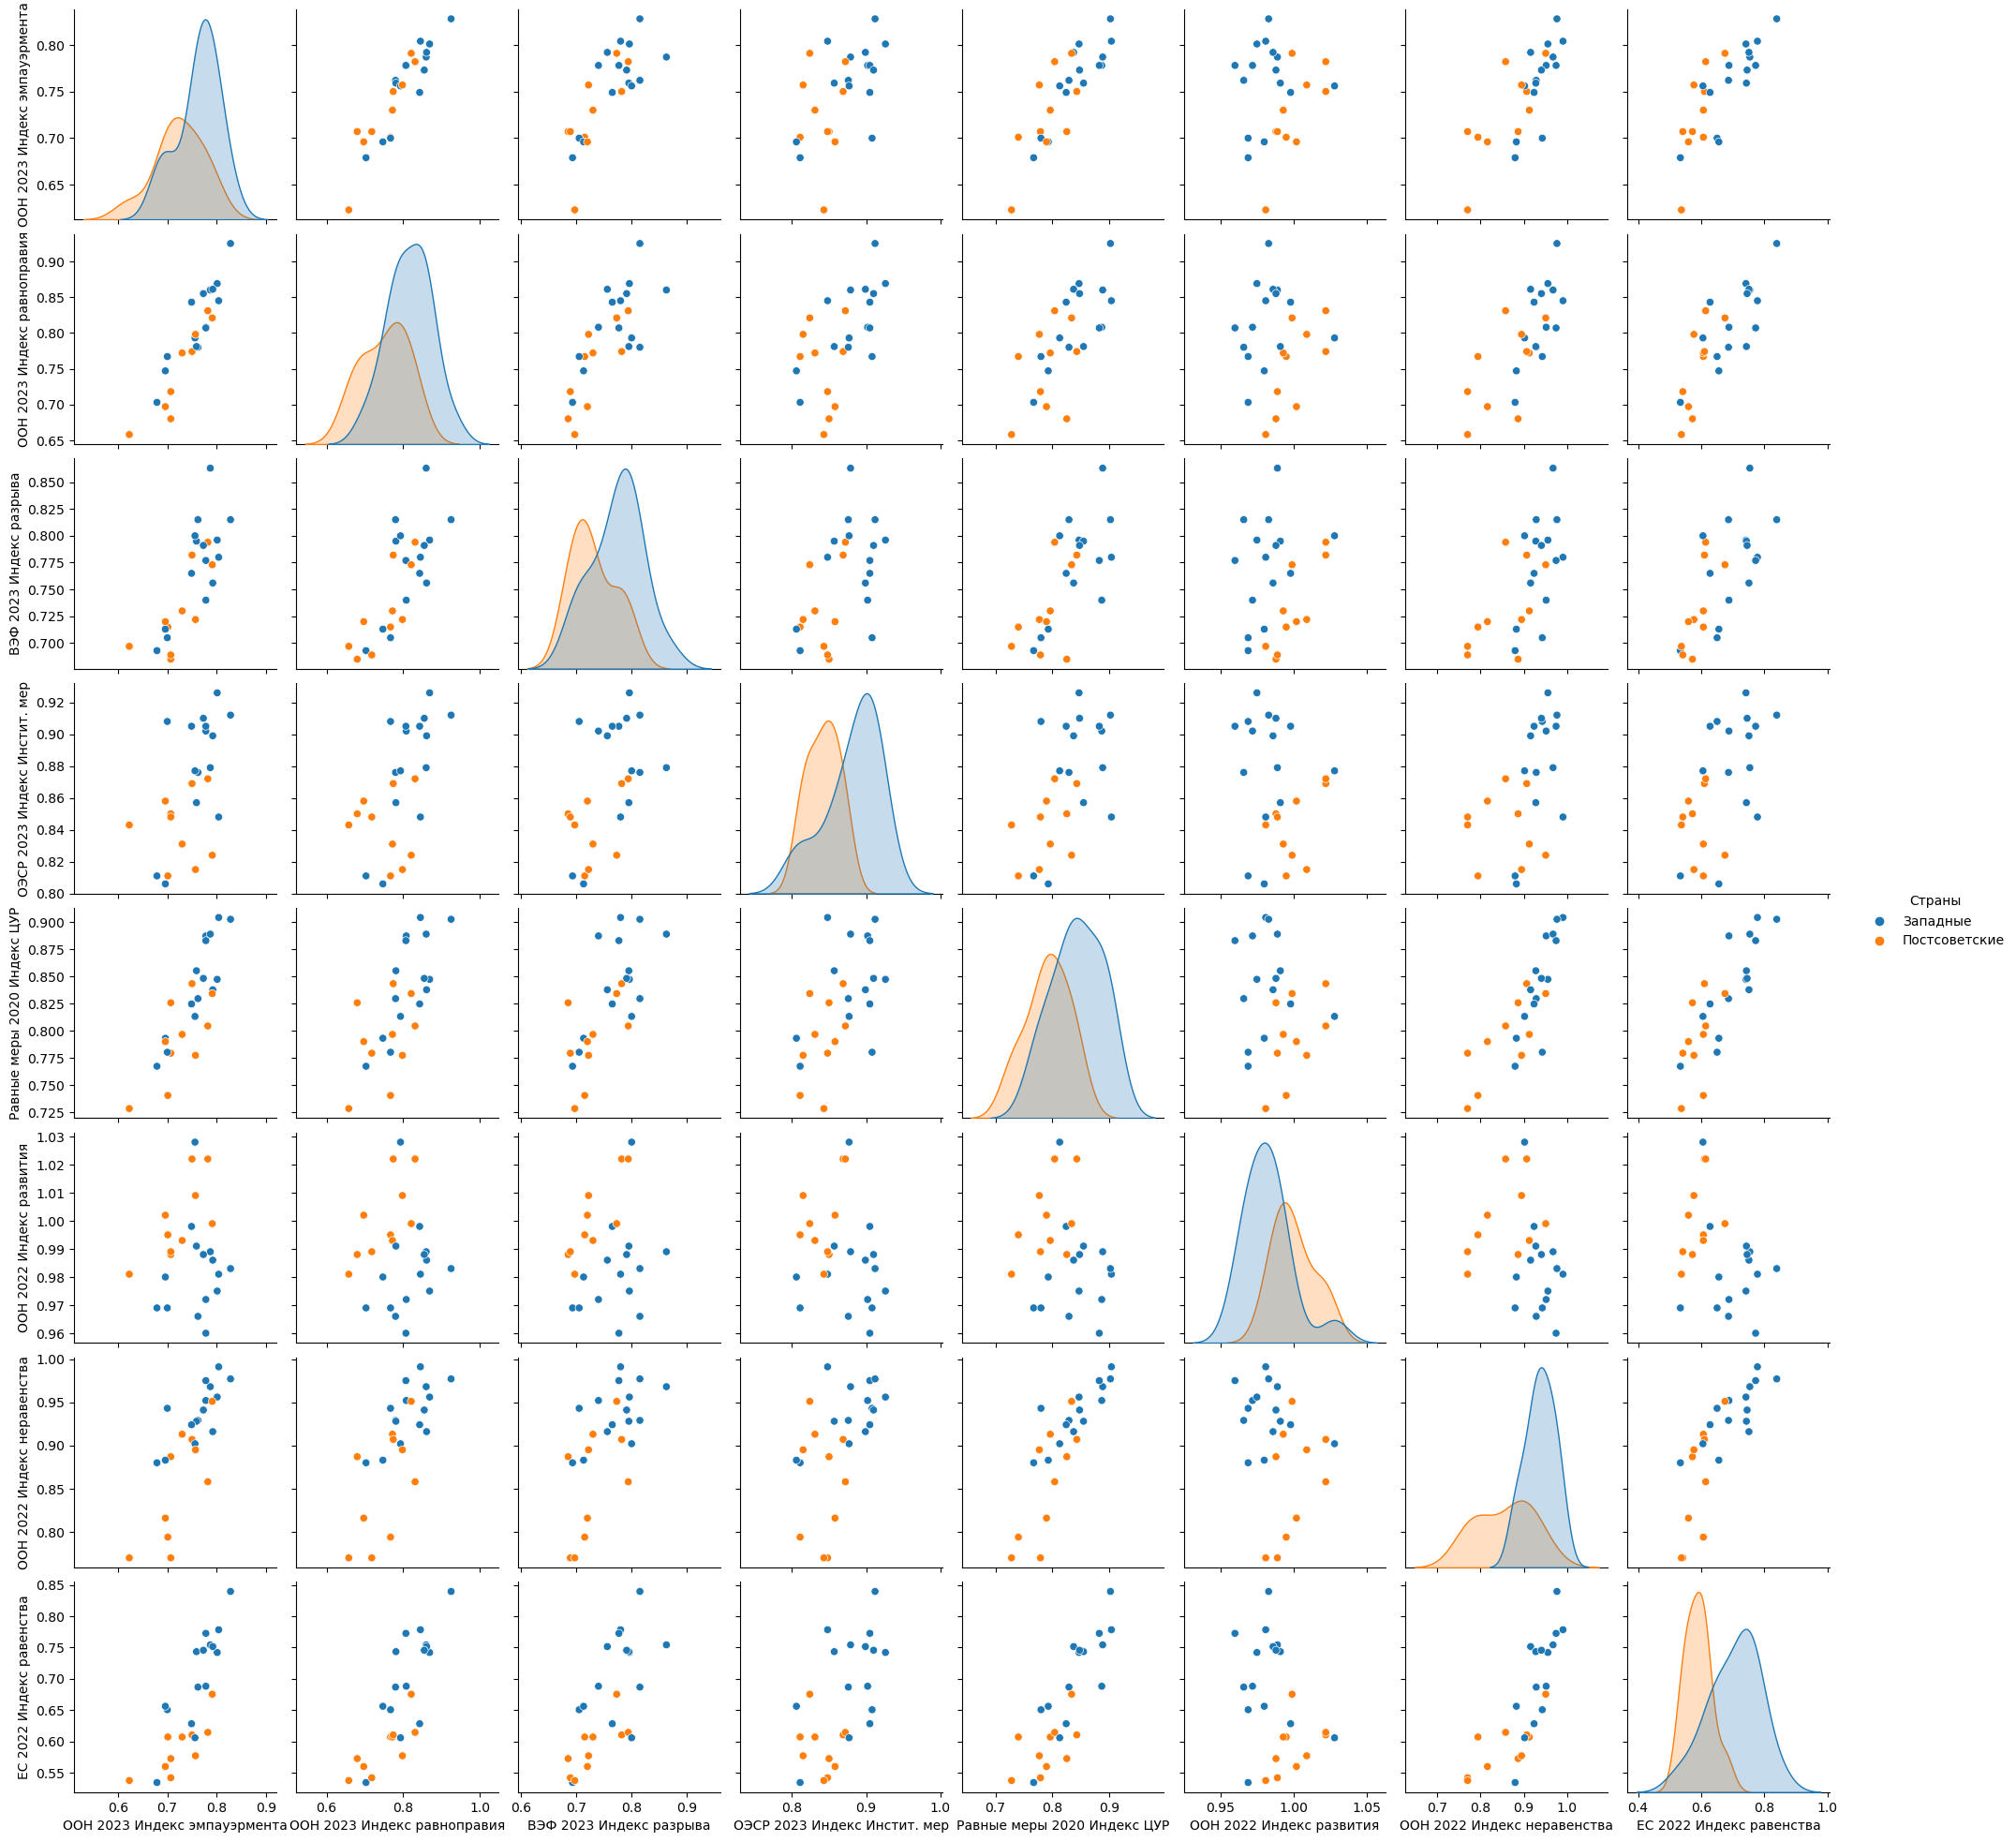

In [10]:
# западные и постсоветские страны
sns.pairplot(df, hue = 'Страны');

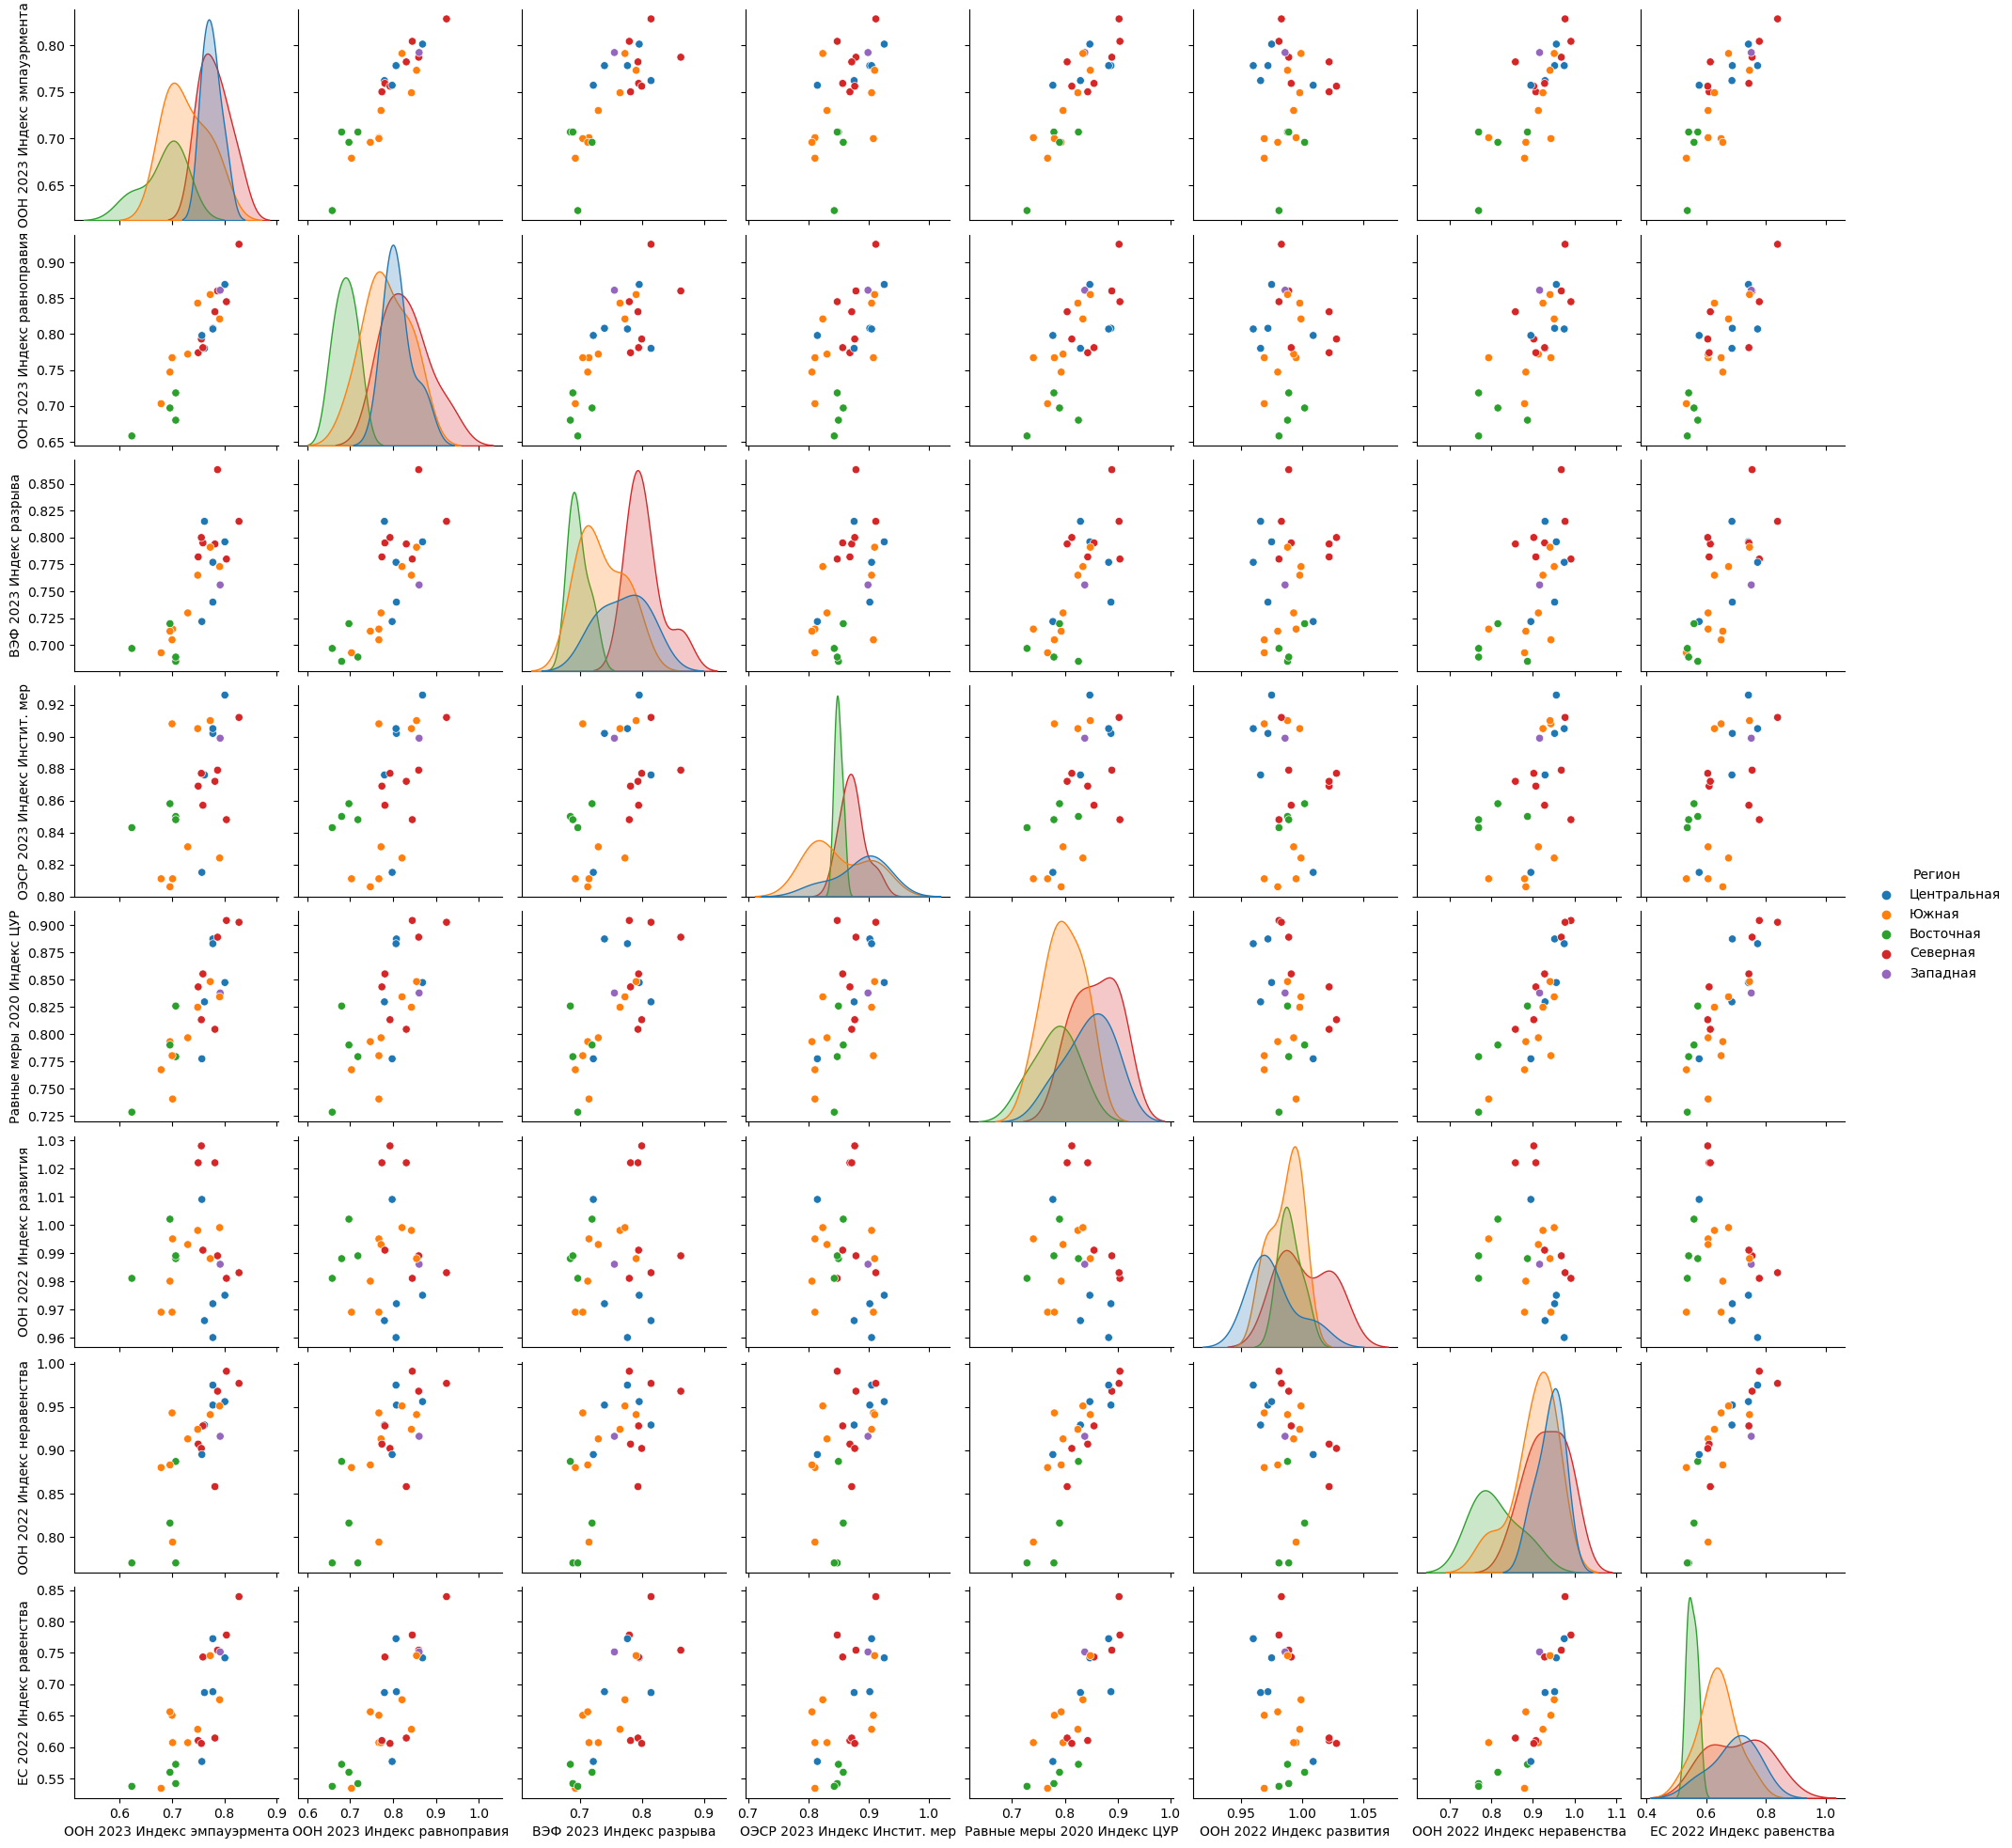

In [11]:
# регионы Европы
sns.pairplot(df, hue = 'Регион');

/var/folders/40/4tj44zl90rv_7zclngp8l_j00000gn/T/ipykernel_26314/1055361769.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/var/folders/40/4tj44zl90rv_7zclngp8l_j00000gn/T/ipykernel_26314/1055361769.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method = 'spearman'), square=False, cmap=v, mask=mask, annot=True);


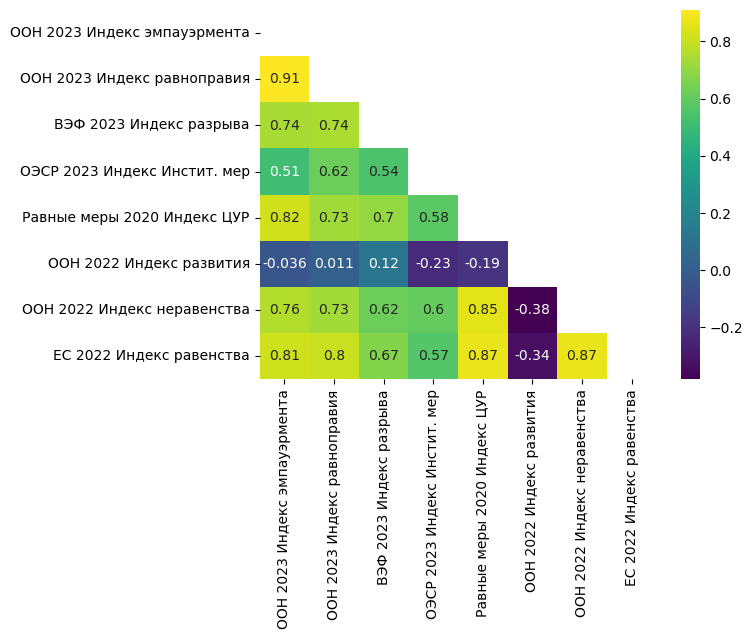

In [12]:
corr = df.corr()
v = sns.color_palette("viridis", as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
# cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(df.corr(method = 'spearman'), square=False, cmap=v, mask=mask, annot=True); 